## Networkx


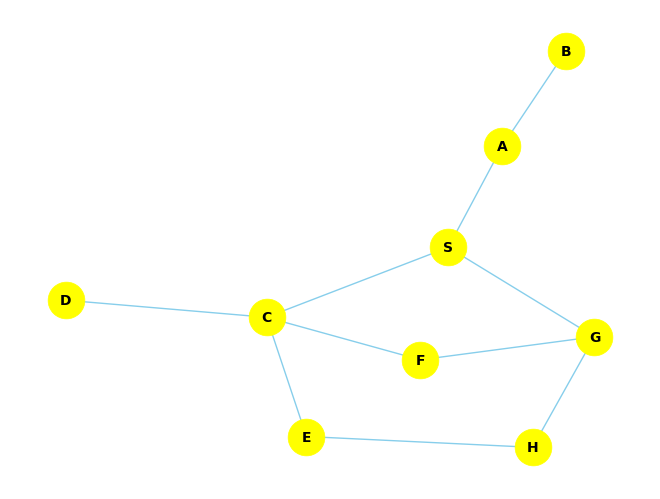

In [ ]:
# @title
import networkx as nx

G = nx.Graph()
# G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "H", "S"])
G.add_edges_from([('A', 'B'), ('A', 'S'), ('S', 'C'), ('S', 'G'), ('C', 'F'), ('C', 'D'), ('C', 'E'), ('G', 'F'), ('G', 'H'), ('H', 'E')])

pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='yellow', font_color='black', font_size=10, edge_color='skyblue', linewidths=0.5)

In [ ]:
# @title
# def sstcreate(G, source):
#   sst = nx.Graph()
#   node_count = {}
#   for i in G.nodes():
#     node_count[i] = 0
#   node = source
#   path = [source]
#   node_count[source] +=1
#   while True:
#     print(node, path)
#     if set(G.neighbors(node)).difference(set(path)) == set():
#       node = path.pop()
#     for i in G.neighbors(node):
#       if i not in path:
#         sst.add_edge(path[-1]+str(node_count[path[-1]]-1), i+str(node_count[i]))
#         path.append(i)
#         node_count[i]+=1
#         node = i
#         break
#   pos = nx.kamada_kawai_layout(sst)
#   nx.draw(sst, pos, with_labels=True, font_weight='bold', node_size=700, node_color='yellow', font_color='black', font_size=10, edge_color='skyblue', linewidths=0.5)
#   return sst

In [ ]:
# @title
def sstcreate(G, source):
  sst = nx.Graph()
  node_count = {}
  for i in G.nodes():
    node_count[i] = 0
  node = source
  prev=source
  node_count[source] +=1
  while True:
    G, sst, node, prev, node_count = traverse(G, sst, node, prev, node_count)
    pos = nx.kamada_kawai_layout(sst)
    nx.draw(sst, pos, with_labels=True, font_weight='bold', node_size=700, node_color='yellow', font_color='black', font_size=10, edge_color='skyblue', linewidths=0.5)
  return sst

In [ ]:
# @title
def traverse(G, sst, node, prev, node_count):
  for i in child(G, node, prev):
    sst.add_edge(prev+str(node_count[prev]-1), i+str(node_count[i]))
    node_count[i]+=1
    traverse(G, sst, i, node, node_count)
  return G, sst, node, prev, node_count

In [ ]:
# @title
def child(G, node, prev):
  if prev in list(G.neighbors(node)):
    res = list(G.neighbors(node)).remove(prev)
    if res==None:
      return []
    return res
  return list(G.neighbors(node))

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7e3bf89da200> (for post_execute):


KeyboardInterrupt: ignored

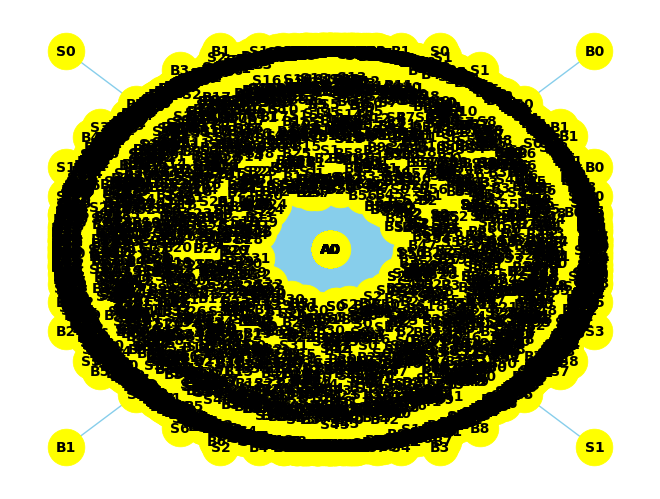

In [ ]:
# @title
# G.remove_node("B")
sstcreate(G, "A")

In [ ]:
# @title
import networkx as nx
import matplotlib.pyplot as plt

def sstcreate(G, source):
    # Create an empty directed graph for the state space tree
    sst = nx.DiGraph()

    # Create a queue for BFS traversal, where each element is a tuple (node, parent)
    queue = [(source, None)]

    while queue:
        current_node, parent = queue.pop(0)

        # Add the node to the state space tree
        sst.add_node(current_node)

        # If there is a parent, add an edge from the parent to the current node
        if parent is not None:
            sst.add_edge(parent, current_node)

        # Explore all neighbors of the current node
        for neighbor in G.neighbors(current_node):
            if neighbor not in sst.nodes:
                # Add the neighbor to the queue with the current node as the parent
                queue.append((neighbor, current_node))

    # Draw the state space tree
    nx.draw(sst, with_labels=True, font_weight='bold', node_size=700, node_color='lightgreen',
            font_color='black', font_size=10, edge_color='green', linewidths=1, arrowsize=15)

    plt.show()

# Example usage
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'S'), ('S', 'C'), ('S', 'G'), ('C', 'F'), ('C', 'D'), ('C', 'E'),
                  ('G', 'F'), ('G', 'H'), ('H', 'E')])

sstcreate(G, 'A')


# Class Definition


Consider the following state-space graph . Construct the state space
tree and reach the goal state H using Breadth-First Search, Depth first
search and Depth Limited search starting from the initial state A

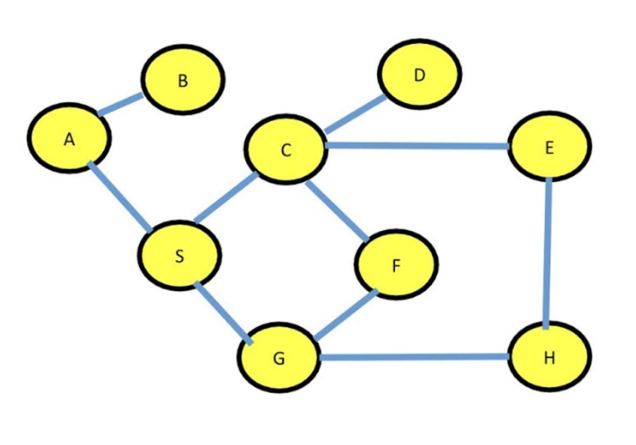

Initial State: A

Goal State   : H

DFS

BFS

DLS

State space Tree create




In [ ]:
class Node:
  def __init__(self, node, parent=None, child=[]):
    self.parent=parent
    self.child=child
    self.node = node

  def __str__(self):
    return self.node

  def parent(self):
    return self.parent

  def child(self):
    return self.child

  def setParent(self, parent):
    self.parent = parent

  def setChild(self, child):
    self.child = child

  def addChild(self, child):
    self.child.append(child)

In [ ]:
class Graph:
  def __init__(self):
    self.graph_dict = {}

  def add_vertex(self, vertex):
    if vertex not in self.graph_dict:
      self.graph_dict[vertex] = []

  def add_edge(self, vertex1, vertex2):
    if vertex1 in self.graph_dict and vertex2 in self.graph_dict:
      self.graph_dict[vertex1].append(vertex2)
      self.graph_dict[vertex2].append(vertex1)
    else:
      print("One or both vertices not found in the graph.")

  def add_vertex_from(self, vertices):
    for vertex in vertices:
      self.add_vertex(vertex)

  def add_edges_from(self, edges):
    for edge in edges:
      if len(edge) == 2:
        vertex1, vertex2 = edge
        self.add_edge(vertex1, vertex2)
      else:
        print("Invalid edge format:", edge)

  def neighbors(self, vertex):
    return self.graph_dict[vertex]

  def nodes(self):
    return list(self.graph_dict.keys())

  def __str__(self):
    result = ""
    for name, neighbors in self.graph_dict.items():
      result += f"{name} -> {neighbors}\n"
    return result.strip()

In [ ]:
G = Graph()
G.add_vertex_from(["A", "B", "C", "D", "E", "F", "G", "H", "S"])
G.add_edges_from([('A', 'B'), ('A', 'S'), ('S', 'C'), ('S', 'G'), ('C', 'F'), ('C', 'D'), ('C', 'E'), ('G', 'F'), ('G', 'H'), ('H', 'E')])

In [2]:
%pip install anytree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 620.4 kB/s eta 0:00:00


In [4]:
import networkx as nx
from anytree import Node, RenderTree

# Create a graph using NetworkX
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "H", "S"])
G.add_edges_from([('A', 'B'), ('A', 'S'), ('S', 'C'), ('S', 'G'), ('C', 'F'), ('C', 'D'), ('C', 'E'), ('G', 'F'), ('G', 'H'), ('H', 'E')])

# Create a root node for the state space tree
root_node = Node("S")

# Set to keep track of visited nodes
visited_nodes = set()

# Function to build the state space tree recursively
def build_tree(graph, parent_node):
    visited_nodes.add(parent_node.name)
    for neighbor in graph.neighbors(parent_node.name):
        if neighbor not in visited_nodes:
            child_node = Node(neighbor, parent=parent_node)
            build_tree(graph, child_node)

# Build the state space tree starting from the root node
build_tree(G, root_node)

# Print the state space tree
for pre, _, node in RenderTree(root_node):
    print(f"{pre}{node.name}")


S
├── A
│   └── B
└── C
    ├── F
    │   └── G
    │       └── H
    │           └── E
    └── D


In [ ]:
## [ Test Cell ]

d = {"A":1, "B":2, "C":3}
list(d.keys())

G.neighbors("D")

['C']

In [ ]:
def sstcreate(Graph, source):
  sst = Node(source, None, [])
  node = source
  path = [source]
  nodedup = sst
  for i in G.neighbors(node):
    if i not in path:
      path.append(i)
      print(G.neighbors(i), node)
      child = G.neighbors(i).remove(node)
      nodei = Node(i, node, child)
      nodedup.addChild(nodei)
      node = i
      nodedup = traverse(nodedup, G, i, path)
  return sst

In [ ]:
def traverse(Node, G, node, path):
  for i in G.neighbors(node):
    if i not in path:
      path.append(i)
      child = G.neighbors(i).remove(node)
      nodei = Node(i, node, child)
      nodedup.addChild(nodei)
      node = i
      nodedup = traverse(nodedup, G, i, path)
  return Node

In [ ]:
sst = sstcreate(G, "A")

['A'] A
['A', 'C', 'G'] B


ValueError: ignored

In [ ]:
def BFS(sst, Goal):
  mincost = 0
  path = []


  return path, mincost

In [ ]:
def DFS(sst, Goal):
  mincost = 0
  path = []


  return path, mincost

In [ ]:
def DLS(sst, Goal):
  mincost = 0
  path = []


  return path, mincost

In [ ]:
class Node:
    def __init__(self, node, parent=None):
        self.parent = parent
        self.node = node
        self.children = []

    def __str__(self):
        return str(self.node)

    def set_parent(self, parent):
        self.parent = parent

    def set_children(self, children):
        self.children = children

    def add_child(self, child):
        self.children.append(child)

    def get_path(self):
        path = [self.node]
        current_node = self
        while current_node.parent is not None:
            current_node = current_node.parent
            path.insert(0, current_node.node)
        return path


class Graph:
    def __init__(self):
        self.graph_dict = {}

    def add_vertex(self, vertex):
        if vertex not in self.graph_dict:
            self.graph_dict[vertex] = []

    def add_edge(self, vertex1, vertex2):
        if vertex1 in self.graph_dict and vertex2 in self.graph_dict:
            self.graph_dict[vertex1].append(vertex2)
            self.graph_dict[vertex2].append(vertex1)
        else:
            print("One or both vertices not found in the graph.")

    def add_vertex_from(self, vertices):
        for vertex in vertices:
            self.add_vertex(vertex)

    def add_edges_from(self, edges):
        for edge in edges:
            if len(edge) == 2:
                vertex1, vertex2 = edge
                self.add_edge(vertex1, vertex2)
            else:
                print("Invalid edge format:", edge)

    def neighbors(self, vertex):
        return self.graph_dict[vertex]

    def nodes(self):
        return list(self.graph_dict.keys())

    def __str__(self):
        result = ""
        for name, neighbors in self.graph_dict.items():
            result += f"{name} -> {neighbors}\n"
        return result.strip()


G = Graph()
G.add_vertex_from(["A", "B", "C", "D", "E", "F", "G", "H", "S"])
G.add_edges_from([('A', 'B'), ('A', 'S'), ('S', 'C'), ('S', 'G'), ('C', 'F'), ('C', 'D'), ('C', 'E'), ('G', 'F'), ('G', 'H'), ('H', 'E')])


def sst_create(graph, source):
    root = Node(source)
    traverse(graph, root, source, set())
    return root


def traverse(graph, node, current_node, visited):
    visited.add(current_node)
    for neighbor in graph.neighbors(current_node):
        if neighbor not in visited:
            child = Node(neighbor, parent=node)
            node.add_child(child)
            traverse(graph, child, neighbor, visited)


sst_root = sst_create(G, "A")


def display_sst(node, indent=0):
    print("  " * indent + str(node))
    for child in node.children:
        display_sst(child, indent + 1)


display_sst(sst_root)


A
  B
  S
    C
      F
        G
          H
            E
      D


In [ ]:
def display_sst(node, indent=0):
    print("  " * indent + str(node))
    for child in node.children:
        display_sst(child, indent + 1)

# Example usage:
display_sst(sst_root)


A
  B
  S
    C
      F
        G
          H
            E
      D


In [ ]:
G.graph_dict

{'A': ['B', 'S'],
 'B': ['A'],
 'C': ['S', 'F', 'D', 'E'],
 'D': ['C'],
 'E': ['C', 'H'],
 'F': ['C', 'G'],
 'G': ['S', 'F', 'H'],
 'H': ['G', 'E'],
 'S': ['A', 'C', 'G']}

In [ ]:
def dfs(adj_matrix):
     letter_cipher ={0:"A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F", 6:"G"}
     stack = []
     node = 0
     marked = [0]
     stack.append(node)
     print("['A']")
     while True:
          junc_found = -1
          for i in range(7):
               if adj_matrix[node][i] == 1:
                    if i in marked:
                         continue
                    junc_found = i
                    break
          if junc_found == -1:
               stack.pop()
               if stack == []:
                    print([])
                    return
               node = stack[-1]
          else:
               marked.append(junc_found)
               stack.append(junc_found)
               node = junc_found
          print([letter_cipher[value] for value in stack])


In [ ]:
def bfs(adj_matrix):
     queue = []
     letter_cipher ={0:"A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F", 6:"G"}
     node = 0  # current_Node = starting node = A
     marked = [0]   # mark A
     queue.append(0) # enqueue(A)
     print("['A']")
     while True:
          for i in range(7):
               if (adj_matrix[node][i] == 1) and (i not in marked):
                    queue.append(i) # enqueue(i)
                    marked.append(i) # mark the junction i
          queue.remove(node) # dequeue()
          print([letter_cipher[value] for value in queue])
          if queue == []:
               break
          node = queue[0] # current_node = queue.front_peek()

# Search Algorithms

In [ ]:
class Graph:
    def __init__(self, adj_list=None):
        self.adj_list = adj_list if adj_list is not None else {}

    def add_edge(self, from_node, to_node):
        if from_node not in self.adj_list:
            self.adj_list[from_node] = []
        self.adj_list[from_node].append(to_node)

    def children(self, node):
        return self.adj_list[node]

    def nodes(self):
        return list(self.adj_list.keys())

In [ ]:
def dfs(graph, source, goal):
    stack = []
    node = source
    marked = [source]
    stack.append(node)
    print([node])
    while True:
        junc_found = -1
        for i in graph.children(node):
            if i not in marked:
                junc_found = i
                break
        if junc_found == -1:
            stack.pop()
            if not stack:
                print("Goal not reached")
                return
            node = stack[-1]
        else:
            marked.append(junc_found)
            stack.append(junc_found)
            node = junc_found
        print(stack)
        if node == goal:
            print("Goal reached!")
            return


def bfs(graph, source, goal):
    queue = []
    node = source
    marked = [source]
    queue.append(source)
    print([node])
    while True:
        for i in graph.children(node):
            if i not in marked:
                queue.append(i)
                marked.append(i)
                if i == goal:
                    print("Goal reached!")
                    return
        if not queue:
            print("Goal not reached")
            break
        node = queue.pop(0)
        print(queue)

In [ ]:
adj_list = {
    'A': ['B', 'S'],
    'B': ['A'],
    'C': ['S', 'F', 'D', 'E'],
    'D': ['C'],
    'E': ['C', 'H'],
    'F': ['C', 'G'],
    'G': ['S', 'F', 'H'],
    'H': ['G', 'E'],
    'S': ['A', 'C', 'G']
}

graph = Graph(adj_list)

print("DFS:")
dfs(graph, "A", "H")

print("\nBFS:")
bfs(graph, "A", "H")

DFS:
['A']
['A', 'B']
['A']
['A', 'S']
['A', 'S', 'C']
['A', 'S', 'C', 'F']
['A', 'S', 'C', 'F', 'G']
['A', 'S', 'C', 'F', 'G', 'H']
Goal reached!

BFS:
['A']
['B', 'S']
['S']
[]
['G']
['F', 'D', 'E']
Goal reached!
